In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
dataset = pd.read_csv('house_Prediction_Data_Set.csv', sep=r'\s+', header=None)

In [ ]:
# Add generic column names
num_columns = dataset.shape[1]
column_names = [f'feature_{i}' for i in range(1, num_columns)] + ['target']
dataset.columns = column_names

In [ ]:
# Inspect the dataset
print("Dataset shape:", dataset.shape)
print("First few rows of the dataset:")
print(dataset.head())

Dataset shape: (506, 14)
First few rows of the dataset:
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0    0.00632       18.0       2.31          0      0.538      6.575   
1    0.02731        0.0       7.07          0      0.469      6.421   
2    0.02729        0.0       7.07          0      0.469      7.185   
3    0.03237        0.0       2.18          0      0.458      6.998   
4    0.06905        0.0       2.18          0      0.458      7.147   

   feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  \
0       65.2     4.0900          1       296.0        15.3      396.90   
1       78.9     4.9671          2       242.0        17.8      396.90   
2       61.1     4.9671          2       242.0        17.8      392.83   
3       45.8     6.0622          3       222.0        18.7      394.63   
4       54.2     6.0622          3       222.0        18.7      396.90   

   feature_13  target  
0        4.98    24.0  
1        9.14    21.6  


In [ ]:
# Handle missing data
dataset.fillna(dataset.median(numeric_only=True).to_dict(), inplace=True)

In [ ]:
# Normalize numerical features
numerical_cols = dataset.columns[:-1]  # Exclude the target column
scaler = StandardScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

In [ ]:
# Split the dataset into training and testing sets
X = dataset.drop(columns=['target'])  # Features
y = dataset['target']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Save preprocessed data for future use
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("Data preprocessing completed successfully.")

Data preprocessing completed successfully.


In [ ]:
#Task-2 -----------------------------------------------------------------------------------------------------------------




import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
#Load the preprocessed datasets
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()  # Flatten y_train to 1D array
y_test = pd.read_csv('y_test.csv').values.ravel()    # Flatten y_test to 1D array
#Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
#Interpret the model coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})
print("Model Coefficients:")
print(coefficients)

Model Coefficients:
       Feature  Coefficient
0    feature_1    -0.971494
1    feature_2     0.701556
2    feature_3     0.276752
3    feature_4     0.706532
4    feature_5    -1.991430
5    feature_6     3.115718
6    feature_7    -0.177060
7    feature_8    -3.045771
8    feature_9     2.282785
9   feature_10    -1.792605
10  feature_11    -1.979954
11  feature_12     1.126499
12  feature_13    -3.628149


In [ ]:
#Evaluate the model
y_pred = model.predict(X_test)

In [ ]:
#Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")



Model Evaluation Metrics:
Mean Squared Error (MSE): 24.29
R-squared (R²): 0.67


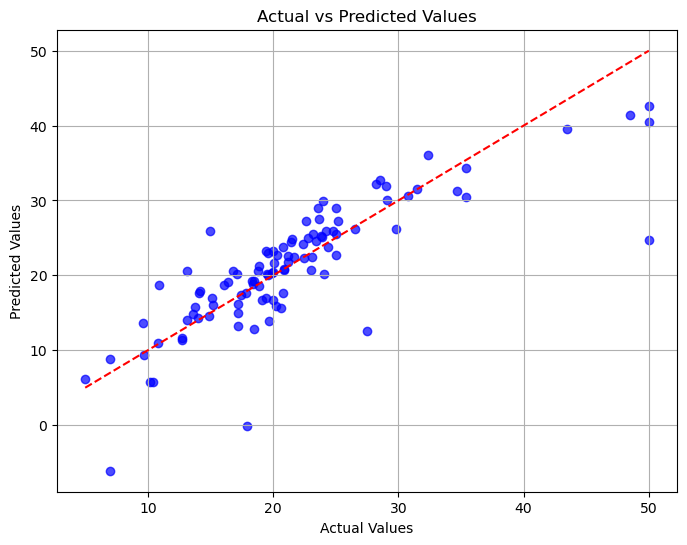

In [ ]:
#Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Ideal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

In [ ]:
import os

# Create the directory if it doesn't exist
os.makedirs('models', exist_ok=True)
import joblib
joblib.dump(model, 'models/linear_regression_model.pkl')


['models/linear_regression_model.pkl']

In [ ]:
#Task-3--------------------------------------------------------------------------------------------------------------





# Convert continuous target into discrete classes
bins = [0, 15, 25, float('inf')]  # Define bins for low, medium, high prices
labels = ['Low', 'Medium', 'High']  # Define class labels
y_train_binned = pd.cut(y_train, bins=bins, labels=labels)
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train_binned)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test_binned, y_pred)
    accuracy_scores.append(accuracy)


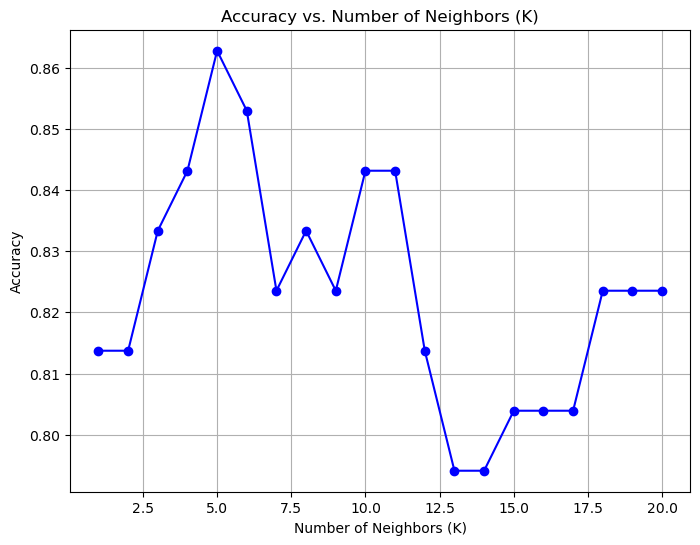

In [ ]:
# Plot Accuracy vs. K
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title("Accuracy vs. Number of Neighbors (K)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [ ]:
# Find the optimal K with the highest accuracy
optimal_k = k_values[np.argmax(accuracy_scores)]
print(f"Optimal K: {optimal_k}")

Optimal K: 5


In [ ]:
# Train the final KNN model with the optimal K
final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
final_knn.fit(X_train, y_train_binned)
y_pred_final = final_knn.predict(X_test)

In [ ]:
# Evaluate the Model
from sklearn.metrics import confusion_matrix, classification_report

accuracy = accuracy_score(y_test_binned, y_pred_final)
conf_matrix = confusion_matrix(y_test_binned, y_pred_final)
class_report = classification_report(y_test_binned, y_pred_final)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(class_report)


Model Evaluation Metrics:
Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.68      0.81        19
         Low       0.75      0.90      0.82        20
      Medium       0.88      0.90      0.89        63

    accuracy                           0.86       102
   macro avg       0.88      0.83      0.84       102
weighted avg       0.87      0.86      0.86       102



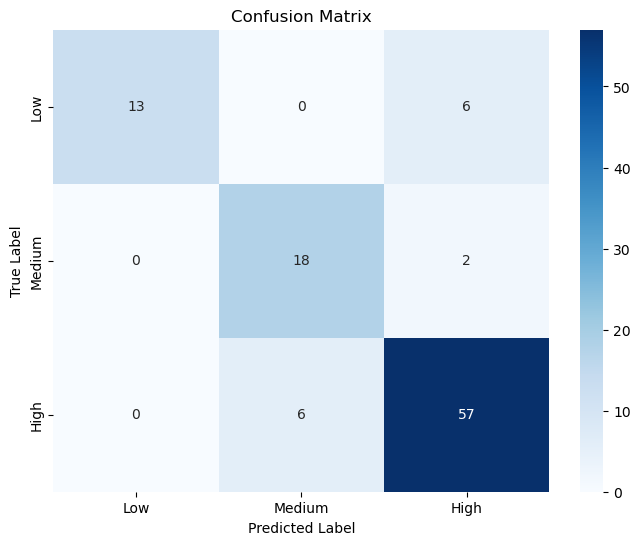

In [ ]:
# Visualize the Confusion Matrix
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import joblib
joblib.dump(final_knn, 'models/final_knn_model.pkl')


['models/final_knn_model.pkl']

In [ ]:
import os
print(os.path.abspath('models/linear_regression_model.pkl'))
print(os.path.abspath('models/final_knn_model.pkl'))


C:\Users\dmand\models\linear_regression_model.pkl
C:\Users\dmand\models\final_knn_model.pkl
